# Virtual Internship @ Birtish Airways 

### Objective:
**To Learn how data scientists at British Airways apply analytical skills to make tangible impact by providing recommendations, tools, and models that drive key business decision**

# Task - 1

## Web scraping to gain company insights

####  Applying webscraping in unstructured data taken from the https://www.airlinequality.com/airline-reviews/british-airways
####  Analyze customer reviews using sentimental analysis to sort positive and negative reviews
#### Preparing a powerpoint representation to highlight our insights and analysis



**British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.**

**As a data scientist at BA, it will be your job to apply your analytical skills to influence real life multi-million-pound decisions from day one, making a tangible impact on the business as your recommendations, tools and models drive key business decisions, reduce costs and increase revenue.**

**Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA.**

**This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights you may uncover.**



---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [213]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
#3718 revies are there in total

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

Setup:

The script sets up the base URL for British Airways reviews, the number of pages to scrape (pages), and the number of reviews per page (page_size).
Scraping Loop:

The script loops through each page (from 1 to the specified number of pages).
For each page, it constructs a URL with the page number and page size.
HTTP Request:

It sends a request to the constructed URL and gets the HTML content of the page.
HTML Parsing:

Using BeautifulSoup, it parses the HTML content to extract information.
Review Extraction:

It finds all HTML elements with the class "text_content" (presumed to contain reviews) and extracts the text of each element.
Data Collection:

The reviews are added to a list (reviews), and the total number of reviews collected so far is printed.
Completion:

After looping through all pages, the reviews list contains all the scraped reviews.
The script essentially goes through each page of British Airways reviews, extracts the text of customer reviews, and collects them in a list. This process is repeated for the specified number of pages.

In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Check in was chaotic and ba...
1,Not Verified | All 4 of our flights were fine ...
2,cNot Verified | I had hoped this would be a g...
3,✅ Trip Verified | I was going to fly to Frank...
4,✅ Trip Verified | Much better experience this ...


In [8]:
df

,reviews
0,✅ Trip Verified | Check in was chaotic and ba...
1,Not Verified | All 4 of our flights were fine ...
2,cNot Verified | I had hoped this would be a g...
3,✅ Trip Verified | I was going to fly to Frank...
4,✅ Trip Verified | Much better experience this ...
...,...
3713,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3714,LHR to HAM. Purser addresses all club passenge...
3715,My son who had worked for British Airways urge...
3716,London City-New York JFK via Shannon on A318 b...


In [9]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [10]:
df.shape

(3718, 1)

In [11]:
df

,reviews
0,✅ Trip Verified | Check in was chaotic and ba...
1,Not Verified | All 4 of our flights were fine ...
2,cNot Verified | I had hoped this would be a g...
3,✅ Trip Verified | I was going to fly to Frank...
4,✅ Trip Verified | Much better experience this ...
...,...
3713,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3714,LHR to HAM. Purser addresses all club passenge...
3715,My son who had worked for British Airways urge...
3716,London City-New York JFK via Shannon on A318 b...


In [12]:
# we have scrapped 3718 reviews from the web using beautiful soup

In [13]:
# from this unclean data we will do sentiment analysis and then form labels +ve , -ve , neutral

Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

## Step 1: Cleaning the text


 the regular expression r'[^a-zA-Z\s]' is used to match any character that is not an uppercase or lowercase letter (a to z or A to Z) or a whitespace character (\s). The re.sub function then replaces these non-alphabetic characters with an empty string, resulting in a cleaned text.

In [15]:
import re


def cleaner(x):
    x = re.sub(r'[^a-zA-Z\s]','',x)
    return x

In [17]:
x = 'a12def%'
cleaner(x)
#it removed everything else

'adef'

In [19]:
df1 = df.copy()

In [20]:
df1['cleaned_reviews'] = df['reviews'].apply(cleaner)

In [21]:
df1

,reviews,cleaned_reviews
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...
2,cNot Verified | I had hoped this would be a g...,cNot Verified I had hoped this would be a go...
3,✅ Trip Verified | I was going to fly to Frank...,Trip Verified I was going to fly to Frankfu...
4,✅ Trip Verified | Much better experience this ...,Trip Verified Much better experience this ti...
...,...,...
3713,LHR-JFK-LAX-LHR. Check in was ok apart from be...,LHRJFKLAXLHR Check in was ok apart from being ...
3714,LHR to HAM. Purser addresses all club passenge...,LHR to HAM Purser addresses all club passenger...
3715,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...
3716,London City-New York JFK via Shannon on A318 b...,London CityNew York JFK via Shannon on A but h...


### Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

### Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

### Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

### Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries


The Punkt tokenizer is a part of the Natural Language Toolkit (NLTK) and is specifically designed for unsupervised training of sentence tokenization models. It uses a data-driven approach to learn sentence boundaries from a large amount of text data. The Punkt tokenizer is particularly useful when dealing with multiple languages and varied text genres.

In [22]:
import nltk

In [23]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ajish\AppData\Roaming\nltk_data...


In [24]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ajish\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ajish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [30]:
pos_tag(word_tokenize('dog is  running'))

[('dog', 'NN'), ('is', 'VBZ'), ('running', 'VBG')]

In [32]:
# POS tagger dictionary

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
# keys are mapped with corresponding pos 
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

In [33]:
token_stop_pos('dog is running')
# we are tokenizing then applying pos then we are applying 

[('dog', 'n'), ('running', 'v')]

In [36]:
a = pos_tag(word_tokenize('dog is running'))
a

[('dog', 'NN'), ('is', 'VBZ'), ('running', 'VBG')]

In [39]:
pos_dict

{'J': 'a', 'V': 'v', 'N': 'n', 'R': 'r'}

In [47]:
print(pos_dict.get(a[0][1][0]))

n


In [49]:
df1.head()

,reviews,cleaned_reviews
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...
2,cNot Verified | I had hoped this would be a g...,cNot Verified I had hoped this would be a go...
3,✅ Trip Verified | I was going to fly to Frank...,Trip Verified I was going to fly to Frankfu...
4,✅ Trip Verified | Much better experience this ...,Trip Verified Much better experience this ti...


In [50]:



df1['POS tagged'] = df1['cleaned_reviews'].apply(token_stop_pos)
df1.head()

,reviews,cleaned_reviews,POS tagged
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...,"[(Trip, n), (Verified, n), (Check, n), (chaoti..."
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...,"[(Verified, n), (flights, n), (fine, a), (term..."
2,cNot Verified | I had hoped this would be a g...,cNot Verified I had hoped this would be a go...,"[(cNot, n), (Verified, n), (hoped, v), (would,..."
3,✅ Trip Verified | I was going to fly to Frank...,Trip Verified I was going to fly to Frankfu...,"[(Trip, n), (Verified, n), (going, v), (fly, v..."
4,✅ Trip Verified | Much better experience this ...,Trip Verified Much better experience this ti...,"[(Trip, n), (Verified, n), (Much, n), (better,..."


In [80]:
df1.rename({'POS tagged':'POS_Tagged'},inplace=True,axis=1)

In [81]:
df1

,reviews,cleaned_reviews,POS_Tagged
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...,"[(Trip, n), (Verified, n), (Check, n), (chaoti..."
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...,"[(Verified, n), (flights, n), (fine, a), (term..."
2,cNot Verified | I had hoped this would be a g...,cNot Verified I had hoped this would be a go...,"[(cNot, n), (Verified, n), (hoped, v), (would,..."
3,✅ Trip Verified | I was going to fly to Frank...,Trip Verified I was going to fly to Frankfu...,"[(Trip, n), (Verified, n), (going, v), (fly, v..."
4,✅ Trip Verified | Much better experience this ...,Trip Verified Much better experience this ti...,"[(Trip, n), (Verified, n), (Much, n), (better,..."
...,...,...,...
3713,LHR-JFK-LAX-LHR. Check in was ok apart from be...,LHRJFKLAXLHR Check in was ok apart from being ...,"[(LHRJFKLAXLHR, n), (Check, n), (ok, a), (apar..."
3714,LHR to HAM. Purser addresses all club passenge...,LHR to HAM Purser addresses all club passenger...,"[(LHR, n), (HAM, n), (Purser, n), (addresses, ..."
3715,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...,"[(son, n), (worked, v), (British, a), (Airways..."
3716,London City-New York JFK via Shannon on A318 b...,London CityNew York JFK via Shannon on A but h...,"[(London, n), (CityNew, n), (York, n), (JFK, n..."


In [61]:
pd.DataFrame([('dog', 'n'), ('running', 'v')])

,0,1
0,dog,n
1,running,v


In [99]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = ""
    for word, pos in pos_data:
        
        if not pos:
            lemma = word
            lemma_rew =lemma + " "
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew +=  lemma + " "
    return lemma_rew


In [100]:
a = token_stop_pos('dog is running')
a

[('dog', 'n'), ('running', 'v')]

In [107]:
a = [('dogs', 'n'), ('running', 'v')]
lemmatize(a)

'dog run '

In [102]:
df1.head(2)

,reviews,cleaned_reviews,POS_Tagged,Lemma
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...,"[(Trip, n), (Verified, n), (Check, n), (chaoti...",though flight fairly comfortable cabin crew fr...
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...,"[(Verified, n), (flights, n), (fine, a), (term...",could travel airline directly return flight AT...


In [103]:

df1['Lemma'] = df1['POS_Tagged'].apply(lemmatize)
df1.head()

,reviews,cleaned_reviews,POS_Tagged,Lemma
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...,"[(Trip, n), (Verified, n), (Check, n), (chaoti...",though flight fairly comfortable cabin crew fr...
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...,"[(Verified, n), (flights, n), (fine, a), (term...",could travel airline directly return flight AT...
2,cNot Verified | I had hoped this would be a g...,cNot Verified I had hoped this would be a go...,"[(cNot, n), (Verified, n), (hoped, v), (would,...",either flight attendant predinner drink come b...
3,✅ Trip Verified | I was going to fly to Frank...,Trip Verified I was going to fly to Frankfu...,"[(Trip, n), (Verified, n), (going, v), (fly, v...",like dont care people Worst serviceairline ever
4,✅ Trip Verified | Much better experience this ...,Trip Verified Much better experience this ti...,"[(Trip, n), (Verified, n), (Much, n), (better,...",another point bizarre interaction female fligh...


In [96]:
df1.iloc[0,1]

' Trip Verified   Check in was chaotic and badly organised Even though there were two desks one for premium and one economy there ended up being just one queue in front of the premium check in even though most passengers in it were economy That meant that those travelling in club or with higher status had no separate queue to join Whilst I was waiting in line another passenger went up to query and we ended up forming a new line in front of the economy check in desk for premium passengers unnecessarily badly organised the staff in charge should be retrained Security at the airport was very quick and through to the lounge This is a generic airport lounge for all airlines and it is actually quite good overall Nice layout and seating options reasonable food and drink options and an outdoor terrace which is really nice Boarding was very well organised although quite slow to get everyone on board but the flight was probably only half full and we still departed early so I think they felt no r

'though flight fairly comfortable cabin crew friendly efficient use avios pay flight obviously good value money '

In [98]:
df1.iloc[0,3]

'though flight fairly comfortable cabin crew friendly efficient use avios pay flight obviously good value money '

In [88]:
df1.iloc[0,2]

[('Trip', 'n'),
 ('Verified', 'n'),
 ('Check', 'n'),
 ('chaotic', 'a'),
 ('badly', 'r'),
 ('organised', 'v'),
 ('Even', 'r'),
 ('though', None),
 ('two', None),
 ('desks', 'n'),
 ('one', None),
 ('premium', 'n'),
 ('one', None),
 ('economy', 'n'),
 ('ended', 'v'),
 ('one', None),
 ('queue', 'n'),
 ('front', 'n'),
 ('premium', 'a'),
 ('check', 'n'),
 ('even', 'r'),
 ('though', None),
 ('passengers', 'n'),
 ('economy', 'n'),
 ('meant', 'v'),
 ('travelling', 'v'),
 ('club', 'n'),
 ('higher', 'a'),
 ('status', 'n'),
 ('separate', 'a'),
 ('queue', 'n'),
 ('join', 'v'),
 ('Whilst', 'n'),
 ('waiting', 'v'),
 ('line', 'n'),
 ('another', None),
 ('passenger', 'n'),
 ('went', 'v'),
 ('query', 'v'),
 ('ended', 'v'),
 ('forming', 'v'),
 ('new', 'a'),
 ('line', 'n'),
 ('front', 'n'),
 ('economy', 'n'),
 ('check', 'n'),
 ('desk', 'n'),
 ('premium', 'a'),
 ('passengers', 'n'),
 ('unnecessarily', 'r'),
 ('badly', 'r'),
 ('organised', 'v'),
 ('staff', 'n'),
 ('charge', 'n'),
 ('retrained', 'v'),
 ('Sec

In [111]:
def lemmatize1(pos_data):
    lemma_rew = ""
    for word, pos in pos_data:
        if pos is None:
            lemma = word
        else:
            # Use the first character of the POS tag for lemmatization
            pos_tag_first_char = pos[0].lower()
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos_tag_first_char)
            
        lemma_rew += lemma + " "  # Add a space after each lemmatized word

    # Strip the trailing space before returning
    return lemma_rew.strip()


In [112]:
lemmatize1(df1.iloc[0,2])

'Trip Verified Check chaotic badly organise Even though two desk one premium one economy end one queue front premium check even though passenger economy mean travel club high status separate queue join Whilst wait line another passenger go query end form new line front economy check desk premium passenger unnecessarily badly organise staff charge retrain Security airport quick lounge generic airport lounge airline actually quite good overall Nice layout seating option reasonable food drink option outdoor terrace really nice Boarding well organise although quite slow get everyone board flight probably half full still depart early think felt rush actually make boarding experience nicer relaxed board club Europe seat fine European business standard although previously comment really good overall meal service disappointing normal BA stock enough proper meal option option limited vary quality BA really stock enough everyone good meal Sadly run time get option vegetarian sausage salad want h

In [110]:
lemmatize(df1.iloc[0,2])

'though flight fairly comfortable cabin crew friendly efficient use avios pay flight obviously good value money '

In [113]:

df1['Lemma'] = df1['POS_Tagged'].apply(lemmatize1)
df1.head()

,reviews,cleaned_reviews,POS_Tagged,Lemma
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...,"[(Trip, n), (Verified, n), (Check, n), (chaoti...",Trip Verified Check chaotic badly organise Eve...
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...,"[(Verified, n), (flights, n), (fine, a), (term...",Verified flight fine term comfort punctuality ...
2,cNot Verified | I had hoped this would be a g...,cNot Verified I had hoped this would be a go...,"[(cNot, n), (Verified, n), (hoped, v), (would,...",cNot Verified hop would good review unfortunat...
3,✅ Trip Verified | I was going to fly to Frank...,Trip Verified I was going to fly to Frankfu...,"[(Trip, n), (Verified, n), (going, v), (fly, v...",Trip Verified go fly Frankfurt Glasgow London ...
4,✅ Trip Verified | Much better experience this ...,Trip Verified Much better experience this ti...,"[(Trip, n), (Verified, n), (Much, n), (better,...",Trip Verified Much good experience time around...


In [114]:
df1

,reviews,cleaned_reviews,POS_Tagged,Lemma
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...,"[(Trip, n), (Verified, n), (Check, n), (chaoti...",Trip Verified Check chaotic badly organise Eve...
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...,"[(Verified, n), (flights, n), (fine, a), (term...",Verified flight fine term comfort punctuality ...
2,cNot Verified | I had hoped this would be a g...,cNot Verified I had hoped this would be a go...,"[(cNot, n), (Verified, n), (hoped, v), (would,...",cNot Verified hop would good review unfortunat...
3,✅ Trip Verified | I was going to fly to Frank...,Trip Verified I was going to fly to Frankfu...,"[(Trip, n), (Verified, n), (going, v), (fly, v...",Trip Verified go fly Frankfurt Glasgow London ...
4,✅ Trip Verified | Much better experience this ...,Trip Verified Much better experience this ti...,"[(Trip, n), (Verified, n), (Much, n), (better,...",Trip Verified Much good experience time around...
...,...,...,...,...
3713,LHR-JFK-LAX-LHR. Check in was ok apart from be...,LHRJFKLAXLHR Check in was ok apart from being ...,"[(LHRJFKLAXLHR, n), (Check, n), (ok, a), (apar...",LHRJFKLAXLHR Check ok apart snap early check c...
3714,LHR to HAM. Purser addresses all club passenge...,LHR to HAM Purser addresses all club passenger...,"[(LHR, n), (HAM, n), (Purser, n), (addresses, ...",LHR HAM Purser address club passenger name boa...
3715,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...,"[(son, n), (worked, v), (British, a), (Airways...",son work British Airways urge fly British Airw...
3716,London City-New York JFK via Shannon on A318 b...,London CityNew York JFK via Shannon on A but h...,"[(London, n), (CityNew, n), (York, n), (JFK, n...",London CityNew York JFK via Shannon really nic...


In [117]:
len(df1.iloc[0,1]),len(df1.iloc[0,3])

(2334, 1504)

In [165]:
df2 = df1[['cleaned_reviews','Lemma']]
df2.head()

,cleaned_reviews,Lemma
0,Trip Verified Check in was chaotic and badl...,Trip Verified Check chaotic badly organise Eve...
1,Not Verified All of our flights were fine in...,Verified flight fine term comfort punctuality ...
2,cNot Verified I had hoped this would be a go...,cNot Verified hop would good review unfortunat...
3,Trip Verified I was going to fly to Frankfu...,Trip Verified go fly Frankfurt Glasgow London ...
4,Trip Verified Much better experience this ti...,Trip Verified Much good experience time around...


**Here we have done tokenization followed by pos and lemmatization then we have made the preprocessed 
words back into the form of the orginal sentence. We have kept the cases as like since Vader sentiment analysis is sensitive to the structure of the text. Also compound score gives the sentiment score  for the text between -1 to 1.this process doesnt reduce the number of words but only makes the word more consistent**   

**Positive Sentiment:
Compound Score: 0.05 to 1.0
A higher positive compound score indicates a stronger positive sentiment.Neutral Sentiment:**

**Compound Score: -0.05 to 0.05
Scores close to zero suggest a neutral sentiment.**

**Negative Sentiment:
**Compound Score: -1.0 to -0.05**
**A lower negative compound score indicates a stronger negative sentiment.**

# Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [118]:
!pip install vaderSentiment


     -------------------------------------- 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [120]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [150]:
a = 'it is  bad dark depressing hate '

In [149]:
analyzer.polarity_scores(a)

{'neg': 0.907, 'neu': 0.093, 'pos': 0.0, 'compound': -0.8689}

In [157]:
text = "I love this product! It's amazing."
analyzer.polarity_scores(text)['compound']


0.8516

In [156]:
len(stopwords.words('english'))


179

In [160]:
def pol_score(x):
    
    score = analyzer.polarity_scores(x)
    return score['compound']
    



0       0.9794
1      -0.3818
2       0.3250
3      -0.6405
4       0.9937
         ...  
3713    0.6635
3714    0.7703
3715    0.7579
3716    0.8070
3717    0.2023
Name: Lemma, Length: 3718, dtype: float64

In [161]:
df1['pol_score']= df1['Lemma'].apply(pol_score)

In [162]:
df1.head(4)

,reviews,cleaned_reviews,POS_Tagged,Lemma,pol_score
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...,"[(Trip, n), (Verified, n), (Check, n), (chaoti...",Trip Verified Check chaotic badly organise Eve...,0.9794
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...,"[(Verified, n), (flights, n), (fine, a), (term...",Verified flight fine term comfort punctuality ...,-0.3818
2,cNot Verified | I had hoped this would be a g...,cNot Verified I had hoped this would be a go...,"[(cNot, n), (Verified, n), (hoped, v), (would,...",cNot Verified hop would good review unfortunat...,0.3250
3,✅ Trip Verified | I was going to fly to Frank...,Trip Verified I was going to fly to Frankfu...,"[(Trip, n), (Verified, n), (going, v), (fly, v...",Trip Verified go fly Frankfurt Glasgow London ...,-0.6405


In [166]:
df2['pol_score']= df2['Lemma'].apply(pol_score)

C:\Users\ajish\AppData\Local\Temp\ipykernel_18460\1971220985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pol_score']= df2['Lemma'].apply(pol_score)


In [167]:
df2.head(2)

,cleaned_reviews,Lemma,pol_score
0,Trip Verified Check in was chaotic and badl...,Trip Verified Check chaotic badly organise Eve...,0.9794
1,Not Verified All of our flights were fine in...,Verified flight fine term comfort punctuality ...,-0.3818


In [168]:
def Sentiment_Finder(x):
    if x >= 0.05:
        return 'Positive'
    elif x <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

In [172]:
df1['Sentiment'] = df1['pol_score'].apply(Sentiment_Finder)

In [205]:
df1.shape

(3718, 6)

In [173]:
df1.Sentiment.value_counts()

Positive    2477
Negative     841
Neutral      400
Name: Sentiment, dtype: int64

In [179]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Count of Each Sentiment')

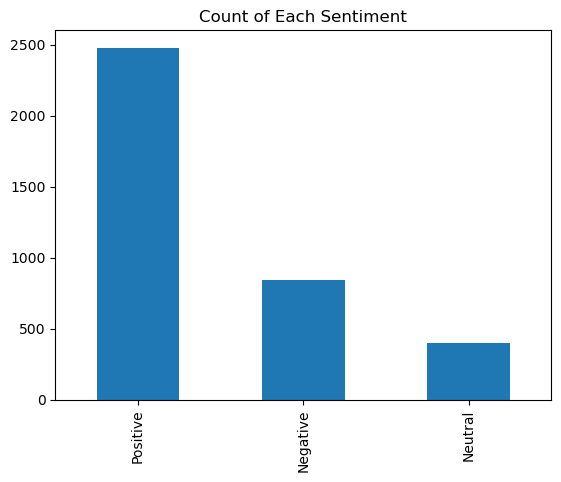

In [180]:
df1.Sentiment.value_counts().plot(kind ='bar')
plt.title('Count of Each Sentiment')

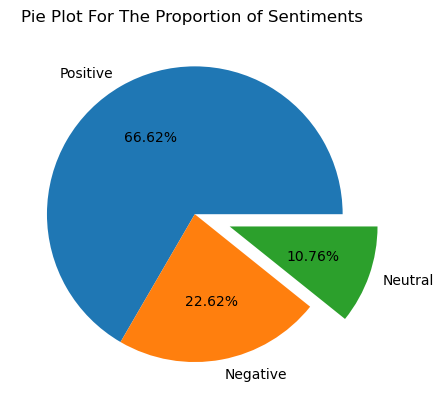

In [206]:
a = df1.Sentiment.value_counts()
la  =a.index

plt.pie(a,labels=la,autopct='%0.2f%%',explode = [0,0,.25])
plt.title('Pie Plot For The Proportion of Sentiments ')
plt.show()

# Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [197]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS

In [ ]:
STOPWORDS

In [199]:
df1.head(2)

,reviews,cleaned_reviews,POS_Tagged,Lemma,pol_score,Sentiment
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...,"[(Trip, n), (Verified, n), (Check, n), (chaoti...",Trip Verified Check chaotic badly organise Eve...,0.9794,Positive
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...,"[(Verified, n), (flights, n), (fine, a), (term...",Verified flight fine term comfort punctuality ...,-0.3818,Neutral


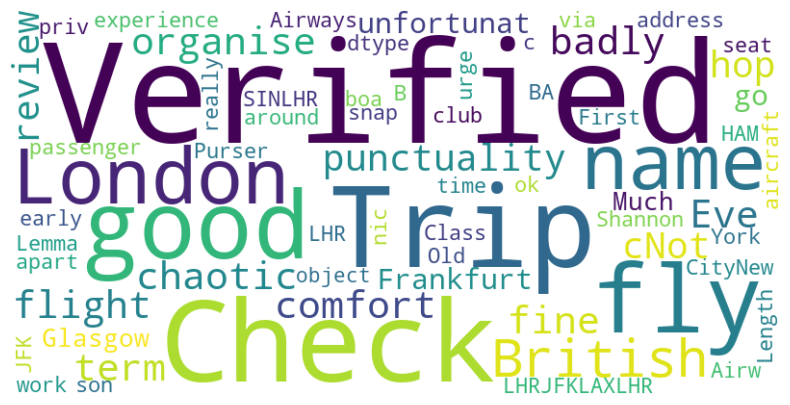

In [204]:
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', stopwords=STOPWORDS).generate(str(df1['Lemma']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [216]:
df1 = pd.read_csv('Birtish_Airways_Review.csv',index_col=0)

In [217]:
df1.head(2)

,reviews,cleaned_reviews,POS_Tagged,Lemma,pol_score,Sentiment
0,✅ Trip Verified | Check in was chaotic and ba...,Trip Verified Check in was chaotic and badl...,"[('Trip', 'n'), ('Verified', 'n'), ('Check', '...",Trip Verified Check chaotic badly organise Eve...,0.9794,Positive
1,Not Verified | All 4 of our flights were fine ...,Not Verified All of our flights were fine in...,"[('Verified', 'n'), ('flights', 'n'), ('fine',...",Verified flight fine term comfort punctuality ...,-0.3818,Neutral


In [219]:
df1_positive = df1[df1['Sentiment'] =='Positive']
df1_negative = df1[df1['Sentiment']=='Negative']

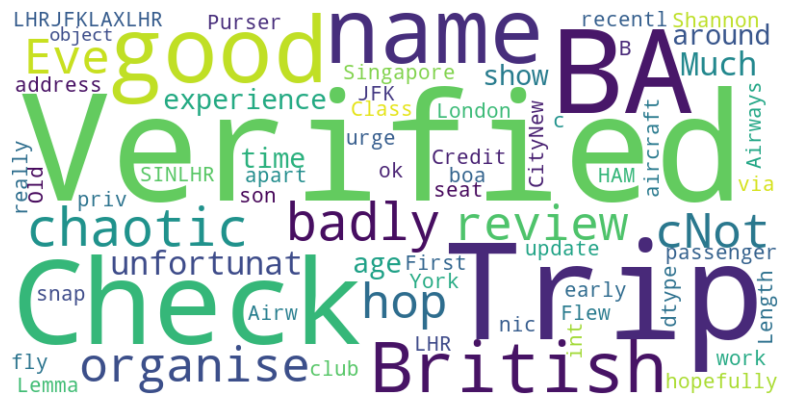

In [224]:
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='White', stopwords=STOPWORDS).generate(str(df1_positive['Lemma']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# In Summary we have scrapped Data From the Review Website then preprocessed the data by removing non alpha characters then tokenized,pos,lemmarized in order to do the sentiment analysis properlty we  made it back to sentence now we apply vectorization to make this words into feature

In [212]:
df1.to_csv('Birtish_Airways_Review.csv')